1.LOAD THE DATA AND CHECK FOR MISSING VALUES AND BASIC STATS

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Check for missing values and basic info
print(customers.info())
print(products.info())
print(transactions.info())

# Check first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

2.EXPLORE CUSTOMER DATASET

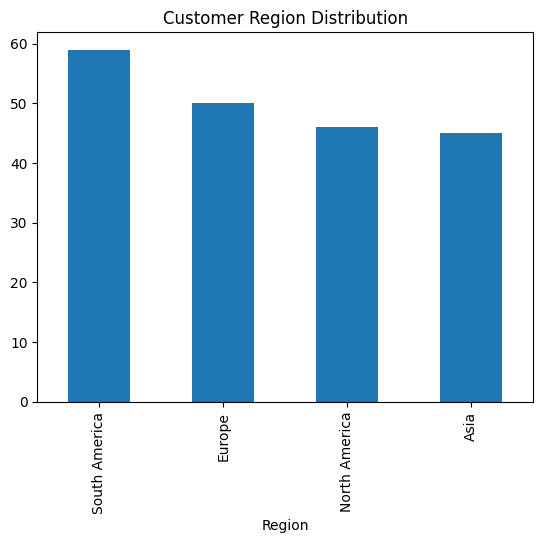

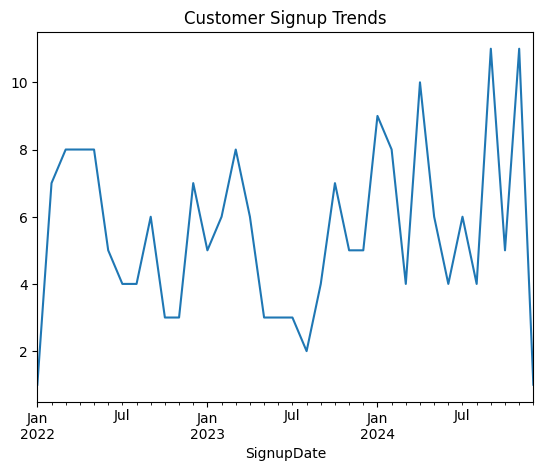

In [13]:
# Region distribution of customers
region_distribution = customers['Region'].value_counts()
region_distribution.plot(kind='bar', title="Customer Region Distribution")
plt.show()

# Signup trends over time (monthly)
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()
signup_trends.plot(kind='line', title="Customer Signup Trends")
plt.show()


3. EXPLORE PRODUCT DATASET

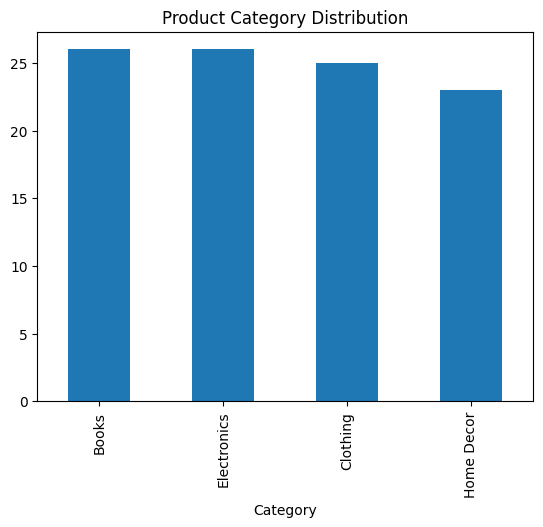

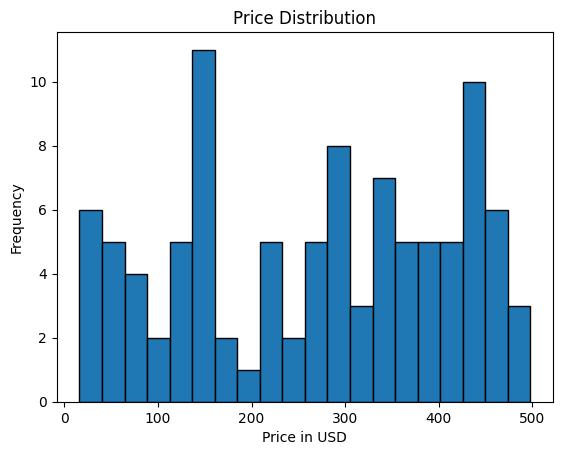

In [14]:
# Category distribution
category_distribution = products['Category'].value_counts()
category_distribution.plot(kind='bar', title="Product Category Distribution")
plt.show()

# Price distribution
products['Price'].describe()
plt.hist(products['Price'], bins=20, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

4. EXPLORE TRANSACTION DATASET

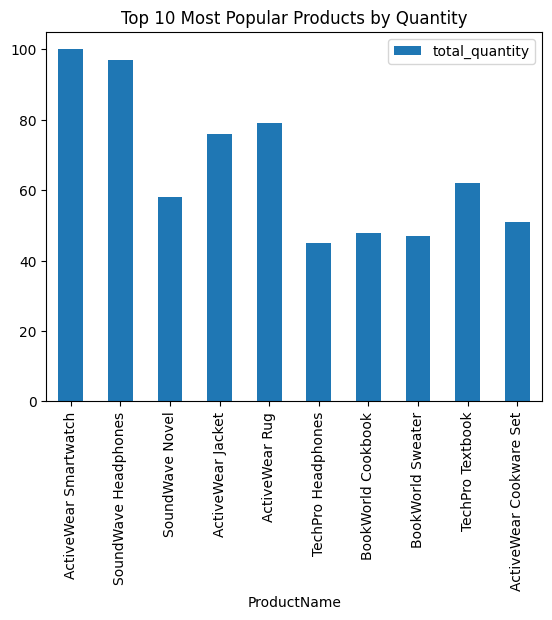

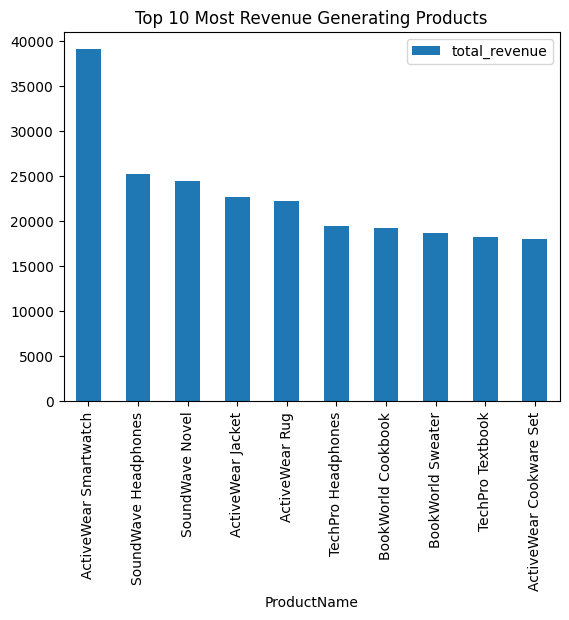

In [15]:
# Merge transactions with product and customer data for better insights
transactions = pd.merge(transactions, products, on='ProductID')
transactions = pd.merge(transactions, customers, on='CustomerID')

# Most popular products by quantity sold
product_sales = transactions.groupby('ProductName').agg(
    total_quantity=('Quantity', 'sum'),
    total_revenue=('TotalValue', 'sum')
).sort_values(by='total_revenue', ascending=False)

# Plot the top 10 most popular products by quantity sold
product_sales.head(10).plot(kind='bar', y='total_quantity', title="Top 10 Most Popular Products by Quantity")
plt.show()

# Revenue analysis for top products
product_sales.head(10).plot(kind='bar', y='total_revenue', title="Top 10 Most Revenue Generating Products")
plt.show()


5. SEGMENTING CUSTOMERS

In [16]:
# Calculate total spending and transaction count for each customer
customer_transactions = transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count')
).reset_index()

# Normalize data for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_transactions_scaled = scaler.fit_transform(customer_transactions[['total_spent', 'transaction_count']])

# Apply KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
customer_transactions['Cluster'] = kmeans.fit_predict(customer_transactions_scaled)

# Display customer segments
customer_segments = customer_transactions.groupby('Cluster').agg(
    avg_spent=('total_spent', 'mean'),
    avg_transactions=('transaction_count', 'mean')
).reset_index()

print(customer_segments)


   Cluster    avg_spent  avg_transactions
0        0  6075.814359          8.102564
1        1  1711.751143          2.842857
2        2  3702.402444          5.388889
